In [161]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import time

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer


In [162]:
# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [163]:
df['good_buy'] = np.where((df['mmr'] > df['sellingprice']) & (df['condition'] >= 20 ) & (df['odometer'] <= 400000),'no', 'yes')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date,good_buy
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00,yes
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00,no
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00,no
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00,no
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00,no


In [164]:
x = df[['condition', 'odometer','mmr', 'sellingprice']]
x.head()

,condition,odometer,mmr,sellingprice
0,19.000000,14538.0,24300.0,7200.0
1,29.000000,25969.0,34200.0,30000.0
2,30.672365,33450.0,20100.0,14700.0
3,49.000000,5826.0,24000.0,23750.0
4,38.000000,10736.0,67000.0,65000.0


In [165]:
y = df['good_buy']
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: good_buy, dtype: object

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 0)

In [167]:
numeric_features = ['condition', 'odometer','mmr', 'sellingprice']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [168]:
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [169]:
prepocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [170]:
knn_pipeline = Pipeline(steps=[
    ('prepocessor', prepocessor), 
    ('classifier', KNeighborsClassifier(metric='minkowski', p=1, n_neighbors= 5))
])

In [171]:
start = time.time()
knn_pipeline.fit(x_train, y_train)
end = time.time()
print(f"execution time {end - start}")

execution time 0.017795801162719727


In [172]:
y_predict = knn_pipeline.predict(x_test)
y_predict

array(['no', 'yes', 'yes', 'yes', 'no', 'yes'], dtype=object)

In [173]:
print(np.array(y_test))

['no' 'no' 'no' 'no' 'no' 'yes']


In [174]:
print(accuracy_score(y_test, y_predict))

0.5


In [175]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       1.00      0.40      0.57         5
         yes       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



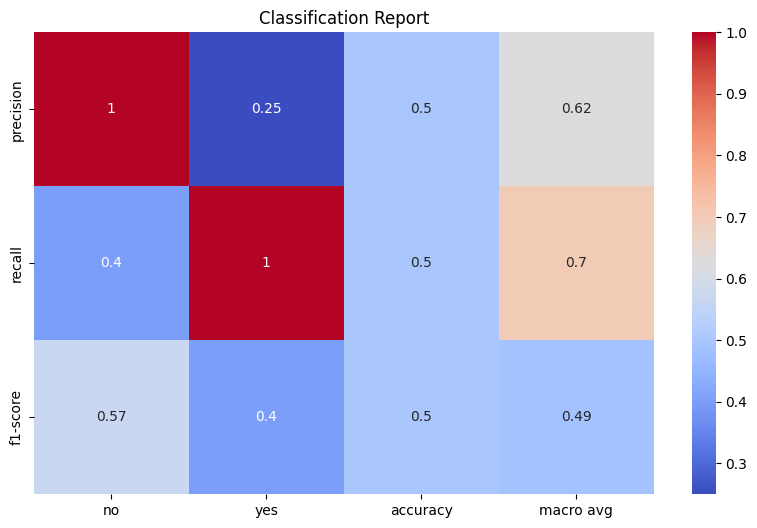

In [176]:
report = classification_report(y_test, y_predict,zero_division=1, output_dict= True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

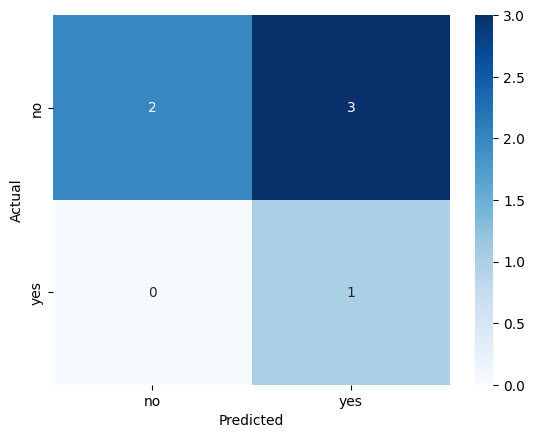

In [177]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, cmap='Blues',
             xticklabels=knn_pipeline.classes_, yticklabels=knn_pipeline.classes_)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()

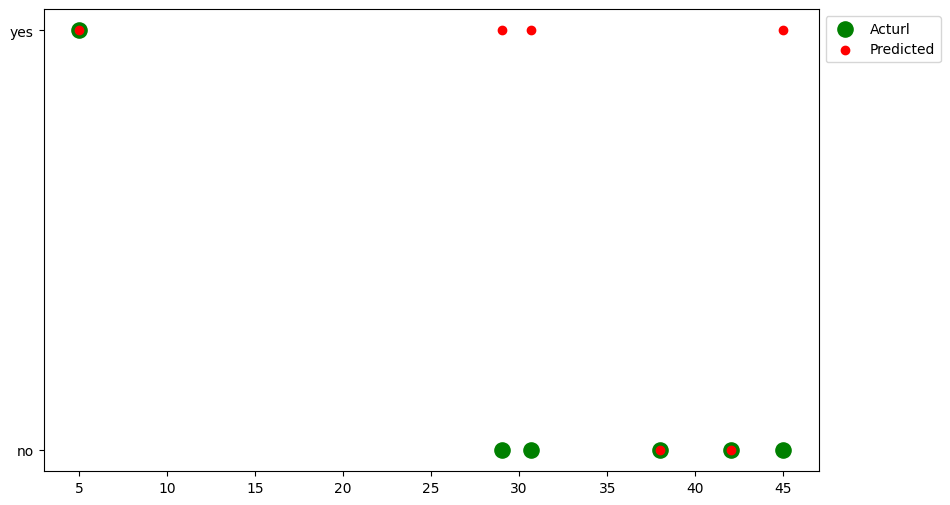

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['condition'], y_test, color ='green', label='Acturl', s =120)
plt.scatter(x_test['condition'], y_predict, color ='red', label='Predicted')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.savefig('./Graph/1.actual_vs_predicted.png')
plt.show()

In [179]:
# Finding BEst K Value

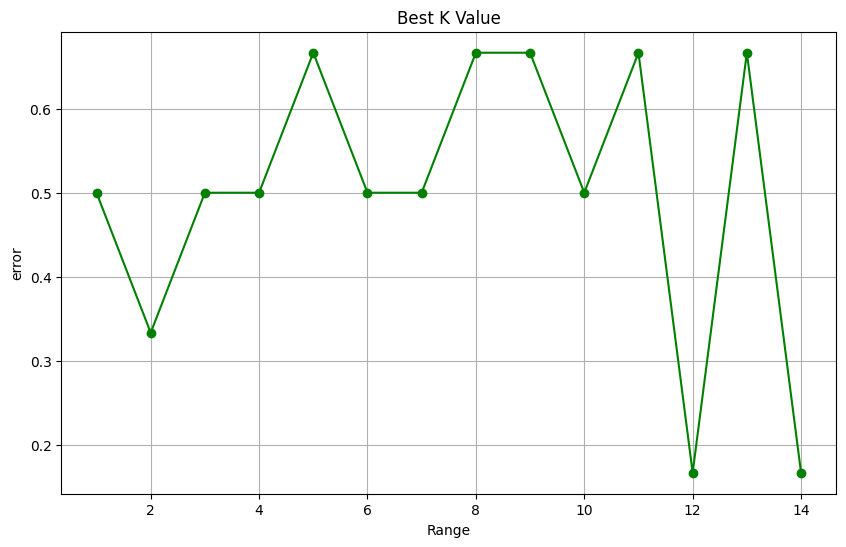

In [180]:
error = []

for i in range(1,15):
    knn_regressor = KNeighborsClassifier(n_neighbors= i)
    knn_regressor.fit(x_train, y_train)
    predict_i = knn_regressor.predict(x_test)
    error.append(np.mean(y_test  != predict_i))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,15), error, marker='o', color='green')

plt.xlabel('Range')
plt.ylabel('error')
plt.title("Best K Value")

plt.grid()
plt.show()

In [181]:
knn_classifier = KNeighborsClassifier(n_neighbors= 12)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [182]:

y_predict = knn_classifier.predict(x_test)

In [183]:
print(accuracy_score(y_test, y_predict))

0.8333333333333334


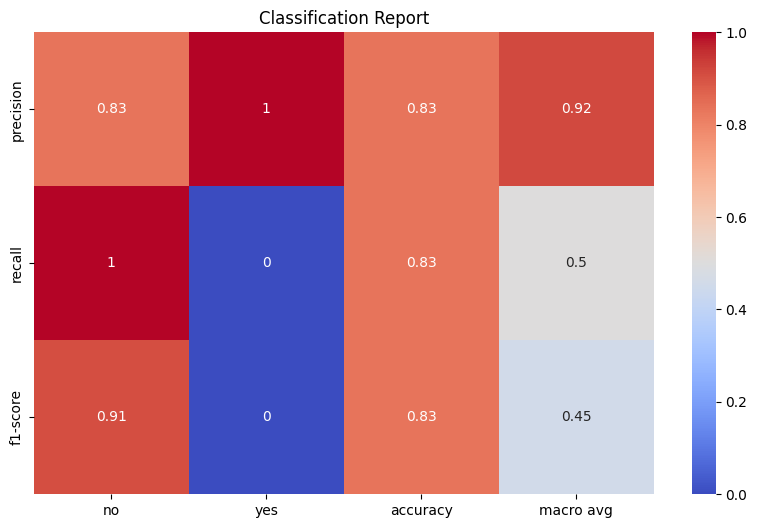

In [184]:
report = classification_report(y_test, y_predict,zero_division=1, output_dict= True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

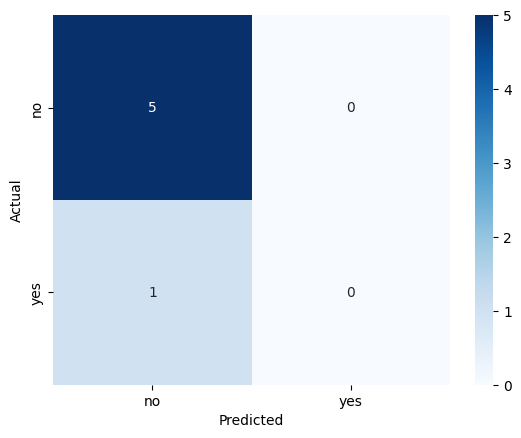

In [185]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, cmap='Blues',
             xticklabels=knn_pipeline.classes_, yticklabels=knn_pipeline.classes_)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()

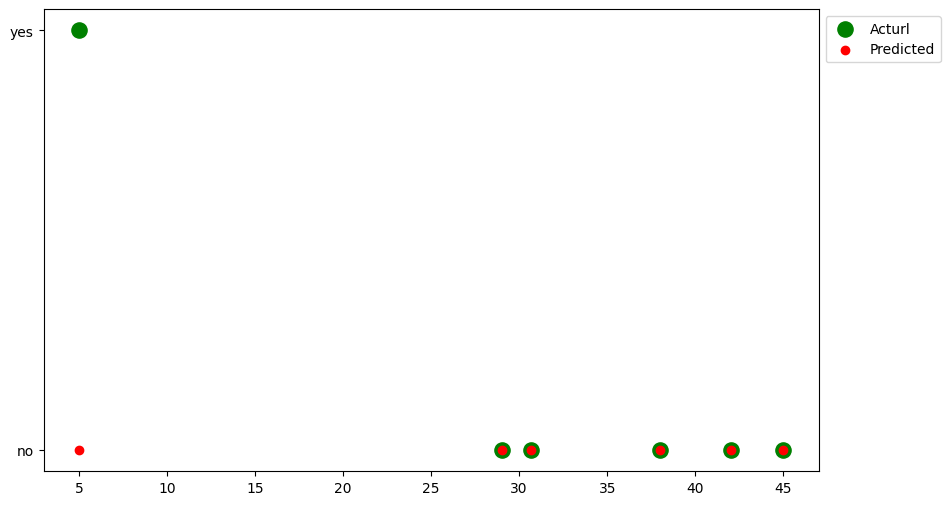

In [186]:
plt.figure(figsize=(10,6))
plt.scatter(x_test['condition'], y_test, color ='green', label='Acturl', s =120)
plt.scatter(x_test['condition'], y_predict, color ='red', label='Predicted')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('./Graph/1.best_actual_vs_predicted.png')
plt.show()

# Finding best k value using GRidSearch cv

In [187]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9,],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [188]:
knn_classifier = KNeighborsClassifier()

In [189]:
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv = 4, scoring='accuracy')

In [190]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [191]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [192]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [193]:
y_predict = knn_classifier.predict(x_test)

In [194]:
print(accuracy_score(y_test, y_predict))

0.5


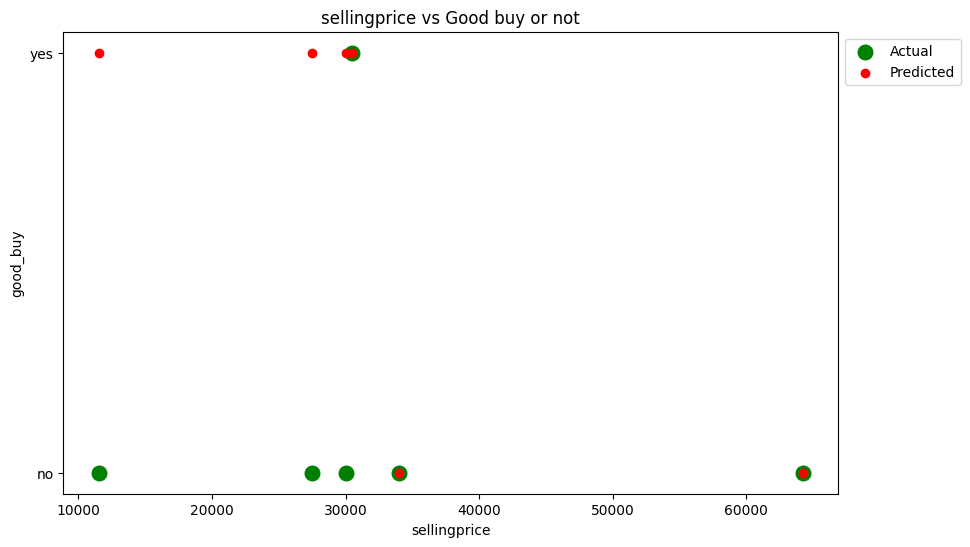

In [195]:
plt.figure(figsize=(10,6))

plt.scatter(x_test['sellingprice'], y_test, color= 'green', label ='Actual', s=110)
plt.scatter(x_test['sellingprice'], y_predict, color= 'red', label ='Predicted')

plt.title('sellingprice vs Good buy or not')
plt.xlabel('sellingprice')
plt.ylabel('good_buy')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()